In [1]:
# hidden
import environment as env
env.initialize()

### Distribución de extremos de la variable predominante: Serie temporal de picos sobre umbral (POT)

Este ejemplo continuará a partir de los datos temporales de altura de ola $H_s$ guardados al final del apartado [Transformacion de los estados de las variables oceanograficas al emplazamiento](cl_transformacion_emplazamiento_01.ipynb). y la serie de picos independientes obtenida en el apartado [Distribución de extremos de la variable predominante: Serie temporal de eventos extremos](cl_regimen_extremal_02.ipynb). Se sigue la metodología de Solari et al. (2017) para la elección del umbral adecuado en el análisis del regimén extremal POT (picos sobre umbral).

Las funciones que se utilizan son:

- clima_maritimo.clima_maritimo.fdist.utils.picos_umb
- clima_maritimo.graficas.plot_extremal.plot_serie_picos_umbral
- clima_maritimo.clima_maritimo.fdist.regimen_extremal.analisis_pot_lmon

In [2]:
# imports Anaconda
from __future__ import division
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# imports ROM 1.1
from clima_maritimo.clima_maritimo.fdist import utils, regimen_extremal
from clima_maritimo.graficas import plot_extremal

dir_data = os.path.join(env.data_path, 'clima')
df_picos = pd.read_pickle(os.path.join(dir_data, 'cadiz_hs_sim_picos.pkl'))
df = pd.read_pickle(os.path.join(dir_data, 'cadiz_hs_sim_emp.pkl'))        

Entradas de usuario:

- Umbral mínimo a considerar $umb\_ex$. En este ejemplo se considera el valor correspondiente al percentil 90.
- Nivel de significancia para las bandas de confianza $alpha$. (0.1 para tener nivel significancia al 95%)


In [3]:
umb_ex = [df.quantile(q=0.90).values[0]]
alpha = 0.1

De todos los picos independientes en la serie temporal se consideran solo aquellos que superan el umbral definido y se guarda el dataframe obtenido.

In [4]:
nanios = len(np.unique(df.index.year))
pos_picos_umb = utils.picos_umb(df_picos.values, umb_ex)

# Guardar a archivo
df_picos_umb_i = df_picos.iloc[pos_picos_umb[0], :]
df_picos_umb_i.to_pickle(os.path.join(dir_data, 'cadiz_hs_sim_picos_umbp90.pkl'))

Utilizando la funcion $plot\_serie\_picos\_umbral$ es posible visualizar los picos sobre umbral:

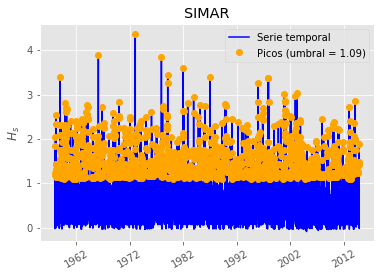

In [5]:
plot_extremal.plot_serie_picos_umbral(df, df_picos_umb_i, '$H_s$', umb_ex[0], 'SIMAR')
plt.show()

A partir de la serie de picos obstenida y una serie de umbrales, a partir del definido en el apartado anterior, se estiman los tres parámetros que definen la distribución generalizada de Pareto según el valor del umbral y se estima la distribución del estadístico $A_2^R$ y el correspondiente $p-valor$. Asimismo, se calculan los valores medios e intervalos de confianza de $H_s$ para distintos periodos de retorno $T_R$. Los resultado se visualizan con la función $plot\_pot\_lmom$. NOTA: Este paso puede tardar mucho tiempo ($O(h)$). Se muestra en pantalla un contador del avance.

In [6]:
au2pv_lmom, au2_lmom_i, valmed_lmom_i, limsup_i, liminf_i, umb_i, treval_i, nanios_i = \
     regimen_extremal.analisis_pot_lmon(df_picos_umb_i, alpha, nanios)

# Guardar a archivo
out_pot_lmon_i = au2pv_lmom, au2_lmom_i, valmed_lmom_i, limsup_i, liminf_i, umb_i, treval_i, nanios_i
np.save(os.path.join(dir_data, 'out_pot_ini_hs_sim_p90.npy'), out_pot_lmon_i)
# au2pv_lmom, au2_lmom_i, valmed_lmom_i, limsup_i, liminf_i, umb_i, treval_i, nanios_i = np.load(os.path.join(dir_data, 'out_pot_ini_hs_sim_p90.npy'))

/Users/andrealira/CloudStation/ROM__1_1/Herramienta/clima_maritimo/clima_maritimo/fdist/regimen_extremal.py:218: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1019 but corresponding boolean dimension is 1018
  umb = umb[np.diff(umb) > 0]


1 de 1018
2 de 1018
3 de 1018
4 de 1018
5 de 1018
6 de 1018
7 de 1018
8 de 1018
9 de 1018
10 de 1018
11 de 1018
12 de 1018
13 de 1018
14 de 1018
15 de 1018
16 de 1018
17 de 1018
18 de 1018
19 de 1018
20 de 1018
21 de 1018
22 de 1018
23 de 1018
24 de 1018
25 de 1018
26 de 1018
27 de 1018
28 de 1018
29 de 1018
30 de 1018
31 de 1018
32 de 1018
33 de 1018
34 de 1018
35 de 1018
36 de 1018
37 de 1018
38 de 1018
39 de 1018
40 de 1018
41 de 1018
42 de 1018
43 de 1018
44 de 1018
45 de 1018
46 de 1018
47 de 1018
48 de 1018
49 de 1018
50 de 1018
51 de 1018
52 de 1018
53 de 1018
54 de 1018
55 de 1018
56 de 1018
57 de 1018
58 de 1018
59 de 1018
60 de 1018
61 de 1018
62 de 1018
63 de 1018
64 de 1018
65 de 1018
66 de 1018
67 de 1018
68 de 1018
69 de 1018
70 de 1018
71 de 1018
72 de 1018
73 de 1018
74 de 1018
75 de 1018
76 de 1018
77 de 1018
78 de 1018
79 de 1018
80 de 1018
81 de 1018
82 de 1018
83 de 1018
84 de 1018
85 de 1018
86 de 1018
87 de 1018
88 de 1018
89 de 1018
90 de 1018
91 de 1018
92 de 10

/Users/andrealira/CloudStation/ROM__1_1/Herramienta/clima_maritimo/graficas/plot_extremal.py:55: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/Users/andrealira/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/andrealira/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


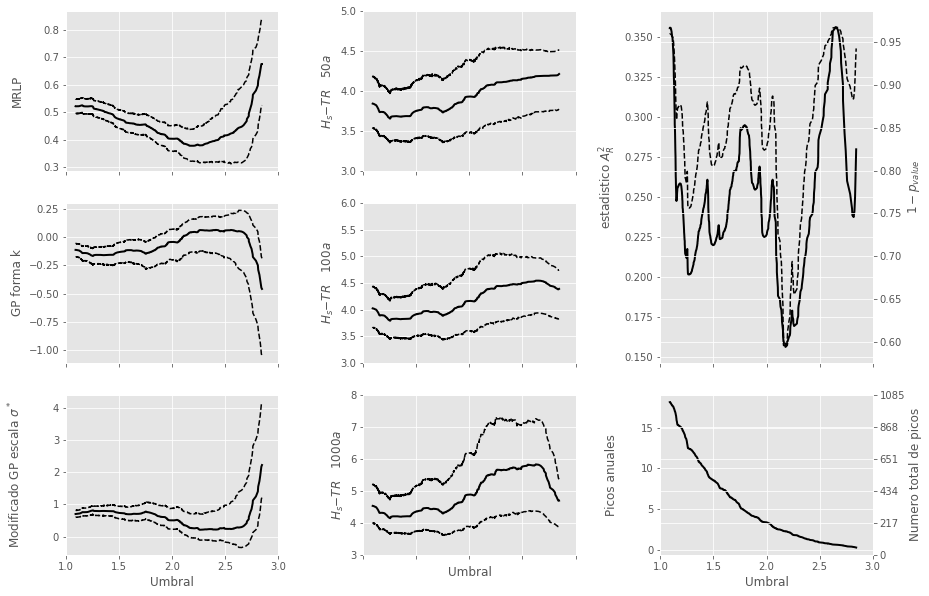

In [7]:
plot_extremal.plot_pot_lmom(umb_i, treval_i, valmed_lmom_i, liminf_i, limsup_i, au2_lmom_i, au2pv_lmom,
                            nanios_i, '$H_s$')
plt.show()

Se observa que existen varios mínimos en las curvas del complemento del $p-valor$ y el estadístico de Anderson-Darling modificado, los cuales sería necesario analizar y estudiar el ajuste a la función de distribución correspondiente. En este caso se elige el umbral que mínimiza el complemento del p-valor y del estadístico.

In [8]:
umbral = umb_i[np.argmin(au2pv_lmom)]
np.save(os.path.join(dir_data, 'umbral_def_hs_sim_pot.npy'), umbral)

print umbral

2.17862434623


Continuar con [Distribución de extremos de la variable principal y obtención de su valor para un determinado periodo de retorno](cl_regimen_extremal_04.ipynb).

Referencias:
   
Solari, S., Egüen, M., Polo, M. J., & Losada, M. A. (2017). Peaks over threshold (POT): A methodology for automatic threshold estimation using goodness‐of‐fit p‐value. Water Resources Research. doi:10.1002/2016WR019426